Covering:
-----------------------

* SELECT
* FROM
* WHERE field = value, field in (value1, value2)
* LIMIT
* GROUP BY
* COUNT, MAX, MIN, AVG
* ORDER BY field [DESC]
* HAVING
* JOIN, INNER JOIN, LEFT OUTER JOIN, RIGHT JOIN, FULL JOIN
* UNION
* UPDATE table SET field = value
* INSERT  INTO table (field1, field2) VALUES (value1, value2)
* DELETE FROM table WHERE [condition]


In [51]:
import pandas as pd
import numpy as np

In [5]:
airports = pd.read_csv('data/airports.csv')

## Selecting data

In [6]:
# select * from airports limit 3

airports.head(3)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN


In [7]:
airport_freq = pd.read_csv('data/airport-frequencies.csv')

In [8]:
# select * from airport_freq limit 3

airport_freq.head(3)

,id,airport_ref,airport_ident,type,description,frequency_mhz
0,70518,6528,00CA,CTAF,CTAF,122.9
1,307581,6589,01FL,ARCAL,NaN,122.9
2,75239,6589,01FL,CTAF,CEDAR KNOLL TRAFFIC,122.8


In [9]:
# select id from airports where ident = 'KLAX'

airports[airports.ident == 'KLAX'].id

27322    3632
Name: id, dtype: int64

In [10]:
# select distinct type from airport

airports.type.unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

In [11]:
# select * from airports where iso_region = 'US-CA' and type = 'seaplane_base'

airports[(airports.iso_region == 'US-CA') & (airports.type == 'seaplane_base')]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
967,7436,0O0,seaplane_base,San Luis Reservoir Seaplane Base,37.058300,-121.125999,544.0,NaN,US,US-CA,Los Banos,no,0O0,NaN,0O0,NaN,NaN,NaN
2471,8877,22CA,seaplane_base,Commodore Center Seaplane Base,37.879902,-122.514000,NaN,NaN,US,US-CA,Sausalito,no,22CA,NaN,22CA,NaN,NaN,NaN
6192,12298,5CA9,seaplane_base,Konocti - Clear Lake Seaplane Base,38.977699,-122.718002,1326.0,NaN,US,US-CA,Kelseyville,no,5CA9,NaN,5CA9,NaN,NaN,NaN
12657,16514,C39,seaplane_base,Folsom Lake Seaplane Base,38.707199,-121.133003,466.0,NaN,US,US-CA,Folsom,no,C39,NaN,C39,NaN,NaN,NaN
14960,16830,CN20,seaplane_base,Ferndale Resort Seaplane Base,39.002998,-122.796997,1326.0,NaN,US,US-CA,Kelseyville,no,CN20,NaN,CN20,NaN,NaN,NaN
17299,17157,E20,seaplane_base,Lake Berryessa Seaplane Base,38.591599,-122.259003,440.0,NaN,US,US-CA,Napa,no,E20,NaN,E20,NaN,NaN,NaN
22340,17613,H77,seaplane_base,Bridge Bay Resort Seaplane Base,40.757599,-122.322998,1065.0,NaN,US,US-CA,Redding,no,H77,NaN,H77,NaN,NaN,NaN
29218,21444,L11,seaplane_base,Pebbly Beach Seaplane Base,33.338402,-118.311996,NaN,NaN,US,US-CA,Avalon,no,KL11,NaN,L11,NaN,NaN,NaN
35236,23479,O06,seaplane_base,Lake Oroville Landing Area Seaplane Base,39.566601,-121.468002,900.0,NaN,US,US-CA,Oroville,no,O06,NaN,O06,NaN,NaN,NaN
38576,24384,S74,seaplane_base,Lost Isle Seaplane Base,38.004101,-121.457001,NaN,NaN,US,US-CA,Stockton,no,S74,NaN,S74,NaN,NaN,NaN


In [12]:
# 3632 is LAX's id, KLAX is ident

airport_freq[airport_freq.airport_ident == 'KLAX']

,id,airport_ref,airport_ident,type,description,frequency_mhz
11852,60767,3632,KLAX,APP,SOCAL APP,36.07
11853,60766,3632,KLAX,APP,SOCAL APP,124.30
11854,60768,3632,KLAX,ATIS,ATIS,133.80
11855,60769,3632,KLAX,CLD,CLNC DEL,121.40
11856,60770,3632,KLAX,DEP,SOCAL DEP,124.30
11857,60771,3632,KLAX,GND,GND,121.65
11858,60772,3632,KLAX,MISC,CG,34.50
11859,60773,3632,KLAX,MISC,CG,898.40
11860,60774,3632,KLAX,OPS,AF,37.22
11861,60775,3632,KLAX,TWR,TWR,119.80


In [13]:
"""
select * 
from airport_freq 
where airport_ident = 'KLAX' 
order by type
"""

airport_freq[airport_freq.airport_ident == 'KLAX']\
  .sort_values('type')

,id,airport_ref,airport_ident,type,description,frequency_mhz
11852,60767,3632,KLAX,APP,SOCAL APP,36.07
11853,60766,3632,KLAX,APP,SOCAL APP,124.30
11854,60768,3632,KLAX,ATIS,ATIS,133.80
11855,60769,3632,KLAX,CLD,CLNC DEL,121.40
11856,60770,3632,KLAX,DEP,SOCAL DEP,124.30
11857,60771,3632,KLAX,GND,GND,121.65
11858,60772,3632,KLAX,MISC,CG,34.50
11859,60773,3632,KLAX,MISC,CG,898.40
11860,60774,3632,KLAX,OPS,AF,37.22
11861,60775,3632,KLAX,TWR,TWR,119.80


In [14]:
"""
select * 
from airport_freq 
where airport_ident = 'KLAX' 
order by type desc
"""

airport_freq[airport_freq.airport_ident == 'KLAX']\
  .sort_values('type', ascending=False)

,id,airport_ref,airport_ident,type,description,frequency_mhz
11862,60776,3632,KLAX,UNIC,UNICOM,122.95
11861,60775,3632,KLAX,TWR,TWR,119.80
11860,60774,3632,KLAX,OPS,AF,37.22
11858,60772,3632,KLAX,MISC,CG,34.50
11859,60773,3632,KLAX,MISC,CG,898.40
11857,60771,3632,KLAX,GND,GND,121.65
11856,60770,3632,KLAX,DEP,SOCAL DEP,124.30
11855,60769,3632,KLAX,CLD,CLNC DEL,121.40
11854,60768,3632,KLAX,ATIS,ATIS,133.80
11852,60767,3632,KLAX,APP,SOCAL APP,36.07


In [15]:
"""
select ident, name, municipality from airports
where iso_region = 'US-CA' 
and type = 'large_airport'
"""

airports[(airports.iso_region == 'US-CA') &
         (airports.type == 'large_airport')]\
  [['ident', 'name', 'municipality']]

,ident,name,municipality
25697,KBAB,Beale Air Force Base,Marysville
26532,KEDW,Edwards Air Force Base,Edwards
27322,KLAX,Los Angeles International Airport,Los Angeles
27849,KOAK,Metropolitan Oakland International Airport,Oakland
27905,KONT,Ontario International Airport,Ontario
28587,KSAN,San Diego International Airport,San Diego
28627,KSFO,San Francisco International Airport,San Francisco
28648,KSJC,Norman Y. Mineta San Jose International Airport,San Jose
28670,KSMF,Sacramento International Airport,Sacramento
28676,KSNA,John Wayne Airport-Orange County Airport,Santa Ana


In [16]:
"""
select * from airports
where type in ('heliport', 'balloonport')
"""

airports[
    airports.type.isin(['heliport', 'balloonport'])].head(3)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
9,322658,00CN,heliport,Kitchen Creek Helibase Heliport,32.727374,-116.459742,3350.0,NaN,US,US-CA,Pine Valley,no,00CN,NaN,00CN,NaN,NaN,NaN
12,6532,00FD,heliport,Ringhaver Heliport,28.846600,-82.345398,25.0,NaN,US,US-FL,Riverview,no,00FD,NaN,00FD,NaN,NaN,NaN


In [17]:
"""
select * from airports
where type not in ('heliport', 'balloonport')
"""

airports[
    ~airports.type.isin(['heliport', 'balloonport'])].head(3)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN


## Aggregating data

In [18]:
"""
select type, count(*) from airports
group by type
"""

airports.groupby('type').size()

type
balloonport          23
closed             2682
heliport           9946
large_airport       589
medium_airport     4531
seaplane_base      1016
small_airport     33549
dtype: int64

In [19]:
"""
select type, count(*) from airports
group by type
order by count(*)
"""

airports.groupby('type')\
    .size()\
    .sort_values()

type
balloonport          23
large_airport       589
seaplane_base      1016
closed             2682
medium_airport     4531
heliport           9946
small_airport     33549
dtype: int64

In [20]:
"""
select type, count(*) from airports
group by type
order by count(*) desc
"""

airports.groupby('type')\
    .size()\
    .sort_values(ascending=False)

type
small_airport     33549
heliport           9946
medium_airport     4531
closed             2682
seaplane_base      1016
large_airport       589
balloonport          23
dtype: int64

In [21]:
"""
select iso_country, type, count(*)
from airports
group by iso_country, type
order by iso_country, type  -- implicit
"""

airports.groupby(['iso_country', 'type'])\
    .size()

iso_country  type          
AD           heliport            2
AE           closed              1
             heliport           21
             large_airport       4
             medium_airport      7
             seaplane_base       3
             small_airport      16
AF           heliport            3
             medium_airport      8
             small_airport      51
AG           medium_airport      1
             small_airport       2
AI           medium_airport      1
AL           closed              1
             heliport            2
             large_airport       1
             medium_airport      4
             small_airport       2
AM           closed              4
             large_airport       1
             medium_airport      3
             small_airport       5
AO           closed             10
             medium_airport     21
             small_airport      70
AQ           closed              2
             medium_airport      4
             small_airport 

In [22]:
airports[airports.iso_country.isin(['US', 'RU'])]\
    .groupby(['iso_country', 'type'])\
    .size()\
    .to_frame('size')\
    .reset_index()

,iso_country,type,size
0,RU,closed,143
1,RU,heliport,107
2,RU,large_airport,20
3,RU,medium_airport,252
4,RU,seaplane_base,4
5,RU,small_airport,493
6,US,balloonport,17
7,US,closed,696
8,US,heliport,6184
9,US,large_airport,174


In [23]:
"""
select iso_country, type, count(*)
from airports
group by iso_country, type
order by iso_country, count(*) desc
"""

airports[airports.iso_country.isin(['US', 'RU'])]\
    .groupby(['iso_country', 'type'])\
    .size()\
    .to_frame('size')\
    .reset_index()\
    .sort_values(['iso_country', 'size'], ascending=[True, False])

,iso_country,type,size
5,RU,small_airport,493
3,RU,medium_airport,252
0,RU,closed,143
1,RU,heliport,107
2,RU,large_airport,20
4,RU,seaplane_base,4
12,US,small_airport,13888
8,US,heliport,6184
7,US,closed,696
10,US,medium_airport,686


## HAVING condition

In [24]:
"""
select type, count(*)
from airports
where iso_country = 'US'
group by iso_country
having count(*) > 1000
order by count(*) desc
"""

airports[airports.iso_country == 'US']\
    .groupby('type')\
    .filter(lambda g: len(g) > 1000)\
    .groupby('type')\
    .size()\
    .sort_values(ascending=False)

type
small_airport    13888
heliport          6184
dtype: int64

In [25]:
"""
select airport_ident, type, description, frequency_mhz
from airport_freq
join airports
on airport_freq.airport_ref = airports.id
where airports.ident = 'KLAX'
"""

"\nselect airport_ident, type, description, frequency_mhz\nfrom airport_freq\njoin airports\non airport_freq.airport_ref = airports.id\nwhere airports.ident = 'KLAX'\n"

In [26]:
airport_freq.merge(
    airports[airports.ident == 'KLAX'][['id']],
    left_on='airport_ref', right_on='id', how='inner')\
    [['airport_ident', 'type', 'description', 'frequency_mhz']]

,airport_ident,type,description,frequency_mhz
0,KLAX,APP,SOCAL APP,36.07
1,KLAX,APP,SOCAL APP,124.30
2,KLAX,ATIS,ATIS,133.80
3,KLAX,CLD,CLNC DEL,121.40
4,KLAX,DEP,SOCAL DEP,124.30
5,KLAX,GND,GND,121.65
6,KLAX,MISC,CG,34.50
7,KLAX,MISC,CG,898.40
8,KLAX,OPS,AF,37.22
9,KLAX,TWR,TWR,119.80


In [27]:
airport_freq.merge(
    airports[airports.ident == 'KLAX'][['id']],
    left_on='airport_ref', right_on='id', how='inner', indicator=True)\
    [['airport_ident', 'type', 'description', 'frequency_mhz', '_merge']]

,airport_ident,type,description,frequency_mhz,_merge
0,KLAX,APP,SOCAL APP,36.07,both
1,KLAX,APP,SOCAL APP,124.30,both
2,KLAX,ATIS,ATIS,133.80,both
3,KLAX,CLD,CLNC DEL,121.40,both
4,KLAX,DEP,SOCAL DEP,124.30,both
5,KLAX,GND,GND,121.65,both
6,KLAX,MISC,CG,34.50,both
7,KLAX,MISC,CG,898.40,both
8,KLAX,OPS,AF,37.22,both
9,KLAX,TWR,TWR,119.80,both


In [28]:
"""
select name, municipality from airports
where ident = 'KLAX'
union all
select name, municipality from airports
where ident = 'KLGB'
"""
pd.concat([
    airports[airports.ident == 'KLAX'][['name', 'municipality']],
    airports[airports.ident == 'KLGB'][['name', 'municipality']]])

,name,municipality
27322,Los Angeles International Airport,Los Angeles
27347,Long Beach /Daugherty Field/ Airport,Long Beach


In [29]:
airports[airports.ident == 'KLAX']

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
27322,3632,KLAX,large_airport,Los Angeles International Airport,33.942501,-118.407997,125.0,NaN,US,US-CA,Los Angeles,yes,KLAX,LAX,LAX,http://www.iflylax.com/,http://en.wikipedia.org/wiki/Los_Angeles_Inter...,NaN


In [30]:
"""
update airports
set home_link = 'http://www.lawa.org/welcomelax.aspx'
where ident == 'KLAX'
"""
airports.loc[
    airports['ident'] == 'KLAX', 'home_link'] = \
    'http://www.lawa.org/welcomelax.aspx'

In [31]:
lax_freq = airport_freq[airport_freq.airport_ident == 'KLAX']
lax_freq

,id,airport_ref,airport_ident,type,description,frequency_mhz
11852,60767,3632,KLAX,APP,SOCAL APP,36.07
11853,60766,3632,KLAX,APP,SOCAL APP,124.30
11854,60768,3632,KLAX,ATIS,ATIS,133.80
11855,60769,3632,KLAX,CLD,CLNC DEL,121.40
11856,60770,3632,KLAX,DEP,SOCAL DEP,124.30
11857,60771,3632,KLAX,GND,GND,121.65
11858,60772,3632,KLAX,MISC,CG,34.50
11859,60773,3632,KLAX,MISC,CG,898.40
11860,60774,3632,KLAX,OPS,AF,37.22
11861,60775,3632,KLAX,TWR,TWR,119.80


In [32]:
lax_freq = lax_freq[lax_freq.type != 'MISC']
lax_freq

,id,airport_ref,airport_ident,type,description,frequency_mhz
11852,60767,3632,KLAX,APP,SOCAL APP,36.07
11853,60766,3632,KLAX,APP,SOCAL APP,124.30
11854,60768,3632,KLAX,ATIS,ATIS,133.80
11855,60769,3632,KLAX,CLD,CLNC DEL,121.40
11856,60770,3632,KLAX,DEP,SOCAL DEP,124.30
11857,60771,3632,KLAX,GND,GND,121.65
11860,60774,3632,KLAX,OPS,AF,37.22
11861,60775,3632,KLAX,TWR,TWR,119.80
11862,60776,3632,KLAX,UNIC,UNICOM,122.95


In [33]:
# Alternatively, DROP rows by index

In [34]:
lax_freq.drop(lax_freq[lax_freq.type == 'MISC'].index)

,id,airport_ref,airport_ident,type,description,frequency_mhz
11852,60767,3632,KLAX,APP,SOCAL APP,36.07
11853,60766,3632,KLAX,APP,SOCAL APP,124.30
11854,60768,3632,KLAX,ATIS,ATIS,133.80
11855,60769,3632,KLAX,CLD,CLNC DEL,121.40
11856,60770,3632,KLAX,DEP,SOCAL DEP,124.30
11857,60771,3632,KLAX,GND,GND,121.65
11860,60774,3632,KLAX,OPS,AF,37.22
11861,60775,3632,KLAX,TWR,TWR,119.80
11862,60776,3632,KLAX,UNIC,UNICOM,122.95


In [35]:
lax_freq.drop(lax_freq.index[6:8])

,id,airport_ref,airport_ident,type,description,frequency_mhz
11852,60767,3632,KLAX,APP,SOCAL APP,36.07
11853,60766,3632,KLAX,APP,SOCAL APP,124.30
11854,60768,3632,KLAX,ATIS,ATIS,133.80
11855,60769,3632,KLAX,CLD,CLNC DEL,121.40
11856,60770,3632,KLAX,DEP,SOCAL DEP,124.30
11857,60771,3632,KLAX,GND,GND,121.65
11862,60776,3632,KLAX,UNIC,UNICOM,122.95


## Top N

In [36]:
# prepare the data first: counts of airports by country
by_country = airports\
    .groupby('iso_country')\
    .size()\
    .to_frame('airport_count')\
    .reset_index()

In [37]:
by_country.head(3)

,iso_country,airport_count
0,AD,2
1,AE,52
2,AF,62


In [38]:
# top 10
"""
select iso_country from by_country
order by size desc
limit 10
"""
by_country.nlargest(10, columns='airport_count')

,iso_country,airport_count
224,US,22209
29,BR,4186
35,CA,2771
12,AU,1955
184,RU,1019
54,DE,933
74,GB,848
72,FR,831
9,AR,827
152,MX,765


In [39]:
# next 10 after top 10
"""
select iso_country from by_country
order by size desc
limit 10 offset 10
"""
by_country.nlargest(10+10, columns='airport_count').tail(10)

,iso_country,airport_count
46,CO,706
105,IT,663
229,VE,592
170,PG,589
117,KR,539
239,ZA,480
43,CL,474
96,ID,462
65,ES,403
45,CN,382


## Aggregate functions

In [40]:
runways = pd.read_csv('data/runways.csv', usecols=['airport_ident', 'length_ft', 'surface', 'lighted', 'closed'])
runways = runways[runways['closed'] == 0]

In [41]:
runways.head(3)

,airport_ident,length_ft,surface,lighted,closed
0,00A,80.0,ASPH-G,1,0
1,00AK,2500.0,GRVL,0,0
2,00AL,2300.0,TURF,0,0


In [42]:
"""
For the runways, find out:
- average length
- median length

select max(length_ft), min(length_ft), mean(length_ft), median(length_ft)
from runways
"""
df = runways.agg({
    'length_ft': ['min', 'max', 'mean', 'median']
})

In [43]:
df

,length_ft
min,0.000000
max,120000.000000
mean,3244.993736
median,2719.500000


In [44]:
df.T

,min,max,mean,median
length_ft,0.0,120000.0,3244.993736,2719.5


## Inserting

In [45]:
"""
create table heroes (id integer, name text);

insert into heroes values (1, 'Harry Potter');
insert into heroes values (2, 'Ron Weasley');
insert into heroes values (3, 'Hermione Granger');

"""
df1 = pd.DataFrame({'id': [1, 2], 'name': ['Harry Potter', 'Ron Weasley']})

In [46]:
df1

,id,name
0,1,Harry Potter
1,2,Ron Weasley


In [60]:
df2 = pd.DataFrame({'id': [3], 'name': ['Hermione Granger']})

In [64]:
pd.concat([df1, df2]).reset_index(drop=True)

,id,name
0,1,Harry Potter
1,2,Ron Weasley
2,3,Hermione Granger


In [47]:
## Plotting

In [60]:
%matplotlib inline

top_10 = by_country.nlargest(10, columns='airport_count')

In [61]:
top_10

,iso_country,airport_count
224,US,22209
29,BR,4186
35,CA,2771
12,AU,1955
184,RU,1019
54,DE,933
74,GB,848
72,FR,831
9,AR,827
152,MX,765


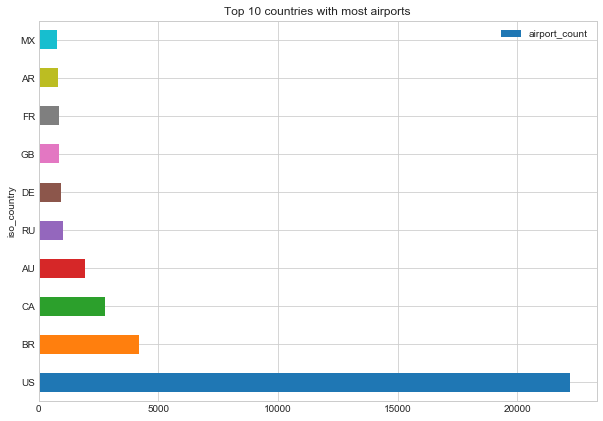

In [84]:
ax = top_10.plot(x='iso_country', 
                 y='airport_count',
                 kind='barh',
                 figsize=(10, 7),
                 title='Top 10 countries with most airports')

In [69]:
countries = pd.read_csv('data/countries.csv')

In [70]:
countries.head(3)

,id,code,name,continent,wikipedia_link,keywords
0,302672,AD,Andorra,EU,http://en.wikipedia.org/wiki/Andorra,NaN
1,302618,AE,United Arab Emirates,AS,http://en.wikipedia.org/wiki/United_Arab_Emirates,"UAE,مطارات في الإمارات العربية المتحدة"
2,302619,AF,Afghanistan,AS,http://en.wikipedia.org/wiki/Afghanistan,NaN


In [75]:
countries_top10 = countries[countries.code.isin(top_10.iso_country)]
countries_top10

,id,code,name,continent,wikipedia_link,keywords
9,302789,AR,Argentina,SA,http://en.wikipedia.org/wiki/Argentina,Aeropuertos de Argentina
12,302764,AU,Australia,OC,http://en.wikipedia.org/wiki/Australia,NaN
29,302791,BR,Brazil,SA,http://en.wikipedia.org/wiki/Brazil,"Brasil, Brasilian"
35,302730,CA,Canada,NaN,http://en.wikipedia.org/wiki/Canada,NaN
54,302681,DE,Germany,EU,http://en.wikipedia.org/wiki/Germany,Flughäfen in Deutschland
72,302687,FR,France,EU,http://en.wikipedia.org/wiki/France,Aéroports de France
74,302688,GB,United Kingdom,EU,http://en.wikipedia.org/wiki/United_Kingdom,Great Britain
153,302747,MX,Mexico,NaN,http://en.wikipedia.org/wiki/Mexico,Aeropuertos de México
187,302714,RU,Russia,EU,http://en.wikipedia.org/wiki/Russia,"Soviet, Sovietskaya, Sovetskaya, Аэропорты России"
228,302755,US,United States,NaN,http://en.wikipedia.org/wiki/United_States,America
